In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#read_data

In [3]:
df=pd.read_csv("Stores.csv")

In [4]:
df.head()

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,0,1,1659,1961,530.0,66490
1,1,2,1461,1752,210.0,39820
2,2,3,1340,1609,720.0,54010
3,3,4,1451,1748,620.0,53730
4,4,5,1770,2111,450.0,46620


In [5]:
df.tail()

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,891,892,1582,1910,1080.0,66390
892,892,893,1387,1663,850.0,82080
893,893,894,1200,1436,1060.0,76440
894,894,895,1299,1560,770.0,96610
895,895,896,1174,1429,1110.0,54340


#describe_data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            896 non-null    int64  
 1   Store ID              896 non-null    int64  
 2   Store_Area            896 non-null    int64  
 3   Items_Available       896 non-null    int64  
 4   Daily_Customer_Count  893 non-null    float64
 5   Store_Sales           896 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 42.1 KB


In [7]:
df.describe()

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,893.000000,896.000000
mean,447.500000,448.500000,1485.409598,1782.035714,785.520717,59351.305804
std,258.797218,258.797218,250.237011,299.872053,262.108737,17190.741895
min,0.000000,1.000000,775.000000,932.000000,70.000000,14920.000000
25%,223.750000,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,447.500000,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,671.250000,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,895.000000,896.000000,2229.000000,2667.000000,1490.000000,116320.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'Store ID ', 'Store_Area', 'Items_Available',
       'Daily_Customer_Count', 'Store_Sales'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=896, step=1)

In [10]:
df.shape

(896, 6)

In [11]:
df.nunique()

Unnamed: 0              896
Store ID                896
Store_Area              583
Items_Available         616
Daily_Customer_Count    127
Store_Sales             816
dtype: int64

In [12]:
df.value_counts()

Unnamed: 0  Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0           1          1659        1961             530.0                 66490          1
602         603        1429        1720             1180.0                59540          1
591         592        1847        2186             910.0                 75120          1
592         593        1009        1202             330.0                 41600          1
593         594        1624        1946             870.0                 20270          1
                                                                                        ..
302         303        1391        1648             720.0                 77070          1
303         304        1577        1892             560.0                 74730          1
304         305        1092        1314             600.0                 76530          1
305         306        1375        1681             440.0                 68900          1
895 

In [13]:
df.corr()

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Unnamed: 0,1.000000,1.000000,-0.058705,-0.055707,-0.019361,0.071486
Store ID,1.000000,1.000000,-0.058705,-0.055707,-0.019361,0.071486
Store_Area,-0.058705,-0.058705,1.000000,0.998891,-0.042668,0.097474
Items_Available,-0.055707,-0.055707,0.998891,1.000000,-0.041886,0.098849
Daily_Customer_Count,-0.019361,-0.019361,-0.042668,-0.041886,1.000000,0.006821
Store_Sales,0.071486,0.071486,0.097474,0.098849,0.006821,1.000000


#preprossesing_data

In [14]:
mask=df.isna().any(axis=0)
mask

Unnamed: 0              False
Store ID                False
Store_Area              False
Items_Available         False
Daily_Customer_Count     True
Store_Sales             False
dtype: bool

In [15]:
mask1=df.isna().any(axis=1)
mask1

0      False
1      False
2      False
3      False
4      False
       ...  
891    False
892    False
893    False
894    False
895    False
Length: 896, dtype: bool

In [16]:
mask1=df.isna().any(axis=1)
mask1.sum()

3

In [17]:
df.duplicated().sum()

0

#outlires_data

<AxesSubplot:xlabel='Store_Sales'>

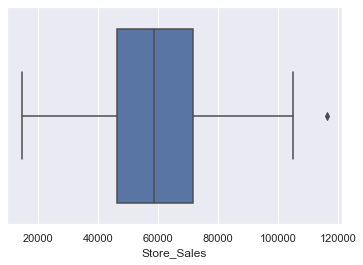

In [18]:
sns.boxplot(x="Store_Sales",data=df)

<AxesSubplot:ylabel='Daily_Customer_Count'>

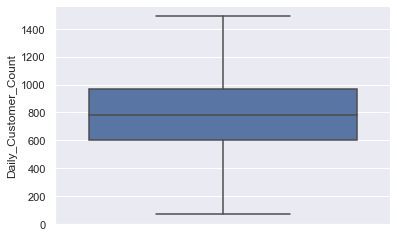

In [19]:
sns.boxplot(y="Daily_Customer_Count",data=df)

<AxesSubplot:ylabel='Items_Available'>

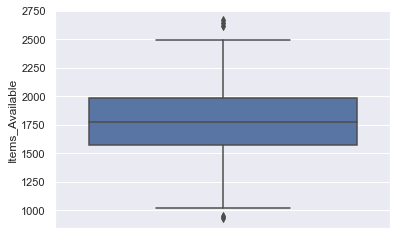

In [20]:
sns.boxplot(y="Items_Available",data=df)

<AxesSubplot:ylabel='Store_Area'>

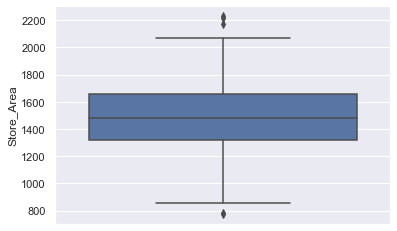

In [21]:
sns.boxplot(y="Store_Area",data=df)

In [22]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)

Unnamed: 0
Store ID 
Store_Area
Items_Available
Daily_Customer_Count


In [23]:
q1 = df[col_name].quantile(0.25)
q1

600.0

In [24]:
q3 = df[col_name].quantile(0.75)
q3    

970.0

In [25]:
iqr = q3 - q1
iqr

370.0

In [26]:
low = q1-1.5*iqr
low    

45.0

In [27]:
high = q3+1.5*iqr
high

1525.0

In [28]:
print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Outliers =  Series([], Name: Daily_Customer_Count, dtype: float64)


In [29]:
 print("Exclude the Outliers = ",df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name])
df[col_name] =df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]
    

Exclude the Outliers =  0       530.0
1       210.0
2       720.0
3       620.0
4       450.0
        ...  
891    1080.0
892     850.0
893    1060.0
894     770.0
895    1110.0
Name: Daily_Customer_Count, Length: 896, dtype: float64


In [30]:
 print("Change the outliers with median ",df[col_name].median())
df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

Change the outliers with median  780.0


<AxesSubplot:ylabel='Daily_Customer_Count'>

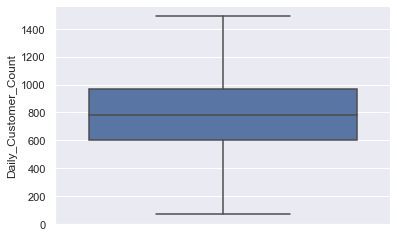

In [31]:
sns.boxplot(y="Daily_Customer_Count",data=df)

#visulizing_data

<AxesSubplot:>

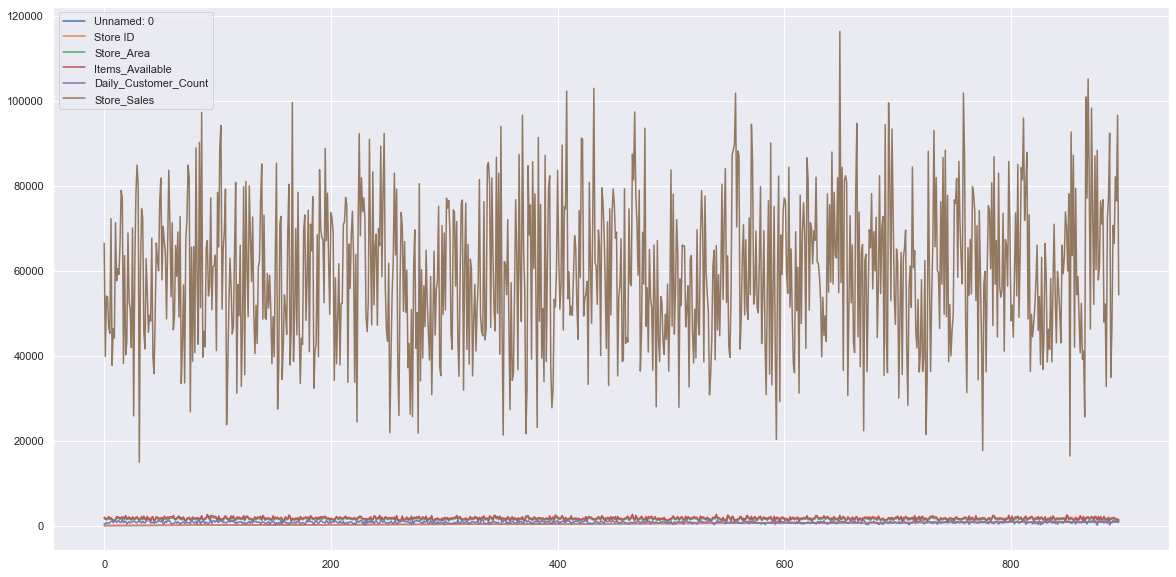

In [32]:
df.plot(figsize=(20,10))

In [33]:
df.columns

Index(['Unnamed: 0', 'Store ID ', 'Store_Area', 'Items_Available',
       'Daily_Customer_Count', 'Store_Sales'],
      dtype='object')

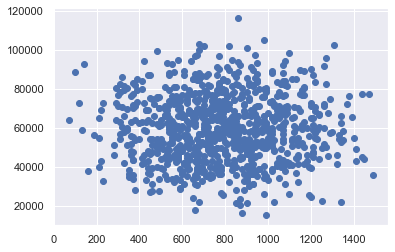

In [34]:
plt.scatter(x="Daily_Customer_Count",y="Store_Sales",data=df)

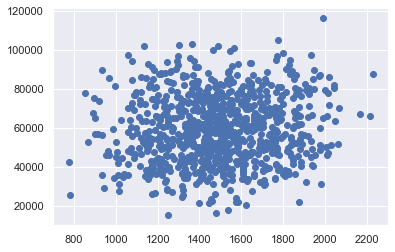

In [35]:
plt.scatter(x="Store_Area",y="Store_Sales",data=df)

In [36]:
COR=df.corr()

In [37]:
COR

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Unnamed: 0,1.000000,1.000000,-0.058705,-0.055707,-0.019361,0.071486
Store ID,1.000000,1.000000,-0.058705,-0.055707,-0.019361,0.071486
Store_Area,-0.058705,-0.058705,1.000000,0.998891,-0.042668,0.097474
Items_Available,-0.055707,-0.055707,0.998891,1.000000,-0.041886,0.098849
Daily_Customer_Count,-0.019361,-0.019361,-0.042668,-0.041886,1.000000,0.006821
Store_Sales,0.071486,0.071486,0.097474,0.098849,0.006821,1.000000


<AxesSubplot:>

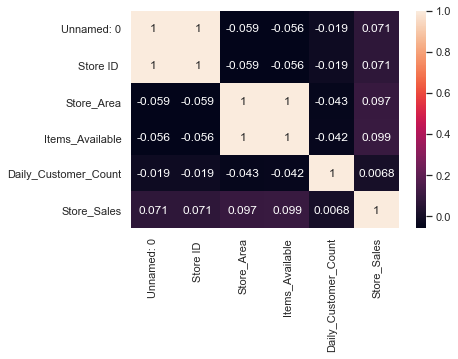

In [38]:
sns.heatmap(COR,annot=True)

#analysis

In [39]:
 df.columns

Index(['Unnamed: 0', 'Store ID ', 'Store_Area', 'Items_Available',
       'Daily_Customer_Count', 'Store_Sales'],
      dtype='object')

In [40]:
df.groupby("Store_Area")["Store_Sales"].max()

Store_Area
775     42530
780     25600
854     77740
869     52540
891     67370
        ...  
2063    51480
2067    70230
2169    67080
2214    65900
2229    87410
Name: Store_Sales, Length: 583, dtype: int64

In [41]:
df.groupby("Store_Area")["Store_Sales"].nlargest(10)

Store_Area     
775         158    42530
780         865    25600
854         744    77740
869         549    52540
891         72     67370
                   ...  
2063        398    51480
2067        849    70230
2169        91     67080
2214        540    65900
2229        466    87410
Name: Store_Sales, Length: 896, dtype: int64

In [42]:
df.groupby("Store_Area")["Store_Sales"].min(10)

Store_Area
775     42530
780     25600
854     77740
869     52540
891     67370
        ...  
2063    51480
2067    70230
2169    67080
2214    65900
2229    87410
Name: Store_Sales, Length: 583, dtype: int64

In [43]:
df.loc?

In [44]:
df.iloc[1:3,::-1]

,Store_Sales,Daily_Customer_Count,Items_Available,Store_Area,Store ID,Unnamed: 0
1,39820,210.0,1752,1461,2,1
2,54010,720.0,1609,1340,3,2


In [45]:
COR["Store_Sales"].sort_values(ascending=False)

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Unnamed: 0              0.071486
Store ID                0.071486
Daily_Customer_Count    0.006821
Name: Store_Sales, dtype: float64

In [46]:
df[df["Store_Area"]==1461]

,Unnamed: 0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
1,1,2,1461,1752,210.0,39820
670,670,671,1461,1739,1250.0,22310


In [47]:
df.to_csv("Stores_new.csv")